In [28]:
# Standard Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Sklearn libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR



ModuleNotFoundError: No module named 'utils.py'; 'utils' is not a package

In [7]:
"""EXPLORATORY DATA ANALYSIS"""

'EXPLORATORY DATA ANALYSIS'

In [4]:
df = pd.read_csv('/home/akeemlag/Downloads/processes2.csv')
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [9]:
print(df.shape)
print(df.info())

(2095, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB
None


In [11]:
# Check for missing values
df.isna().sum() # There are no missing values

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

In [12]:
# Check for duplicate cols
df[df.duplicated()] # No duplicate cols

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)


In [14]:
# Drop unnamed cols since it is a unique identifier and offers no specific trend
df1 = df.drop('Unnamed: 0', axis=1)

In [15]:
# Summary statistics
df1.describe()

,year,selling_price,km_driven,seats,max_power (in bph),Mileage,Engine (CC)
count,2095.000000,2.095000e+03,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000
mean,2014.052506,4.272799e+05,67413.593795,5.096897,77.410427,21.397928,1205.078282
std,3.273451,2.326698e+05,41580.846333,0.457000,19.884938,1.209234,245.058696
min,2000.000000,4.595700e+04,1000.000000,4.000000,35.000000,19.600000,624.000000
25%,2012.000000,2.500000e+05,35000.000000,5.000000,67.040000,20.360000,998.000000
50%,2014.000000,3.900000e+05,60000.000000,5.000000,74.000000,21.100000,1248.000000
75%,2017.000000,5.555000e+05,90000.000000,5.000000,88.730000,22.540000,1396.000000
max,2020.000000,1.594000e+06,270000.000000,8.000000,126.320000,23.590000,1598.000000


In [62]:
df.km_driven.unique()

array([145500, 127000,  45000,  90000, 169000,  53000,  80000, 100000,
        72000,  35000,  64000, 120000, 110000,  60000,  30000,  40000,
       170000,  10000,  28000,  68000,  77000, 150000,  69000,  13000,
        50000,  76139,  25000,  65000,  24300,   8000,  36600,  14000,
        70000,  20000,   7800,   5000,  32000, 140000,  37000,  39000,
        92500, 158000,  16500,  99361,  47000,  36000, 185000,  52000,
        58343,   5621,  69779, 106000,  67000,  18000,  46000,  15000,
        58000,  54000,  75000,  76000,   1500,  40906,  43755, 221889,
       150546,  24000, 125000,  98000,  17000, 135000,  86000,  38000,
       156060,  43000,  57000,  12000,  18945, 107825,  85000, 108000,
        90400,  96000,  63186,  91500,  81632, 101504, 125531, 206000,
       105000,  74000,  41779,  63309,  27000,  89100, 126000, 210000,
        72113, 113000,  91000, 104500,  19723,  25471,  74381,  63982,
        56000,  19500,  52380,  74250,  57247,  42323,  20375,  40200,
      

Index(['year', 'selling_price', 'km_driven', 'seats', 'max_power (in bph)',
       'Mileage', 'Engine (CC)'],
      dtype='object')


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

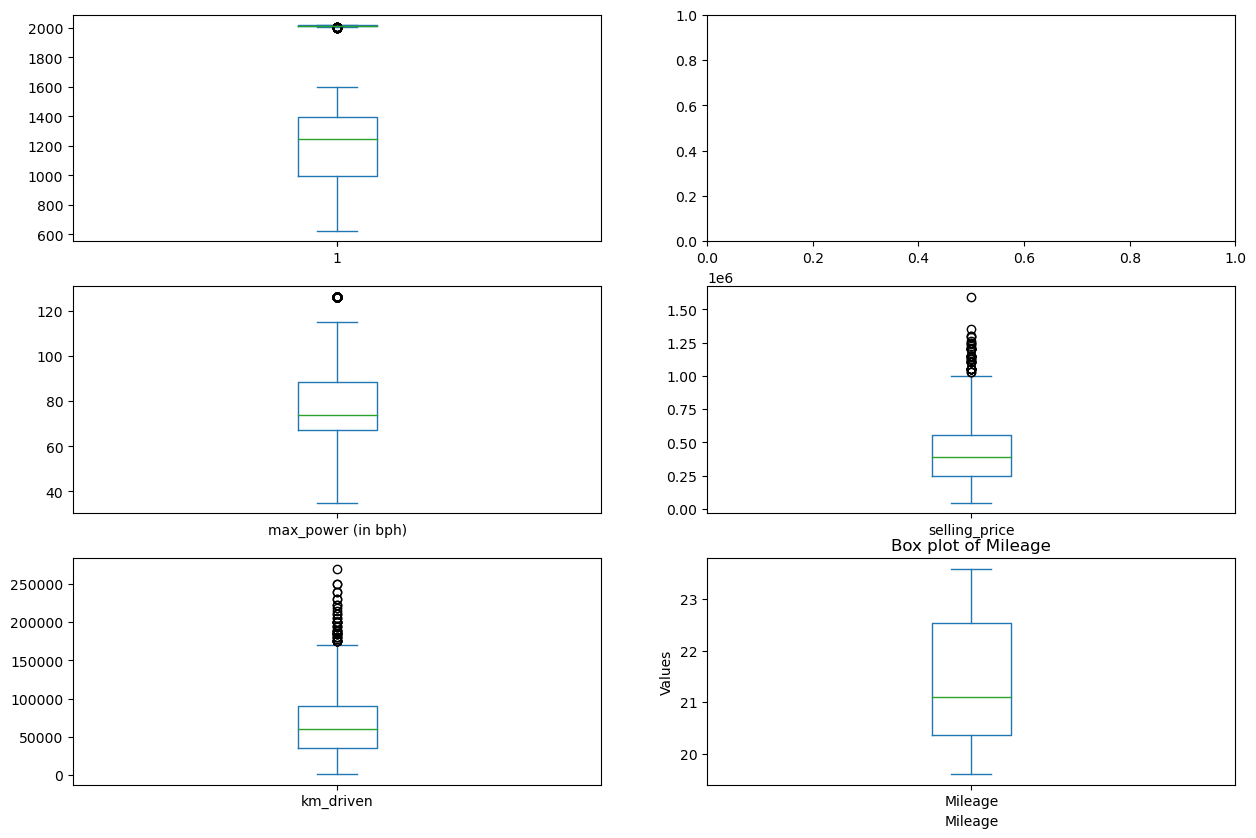

In [73]:
# Create box plot to illustrate ouliers for numerical cols
%run utils.py
display_outliers(plt=plt, df=df1)


In [110]:
"""ANLYSIS"""
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

In [86]:
%run utils.py
outliers = find_outliers('km_driven', df1)
outliers.km_driven.index

upper_limit:  {172500.0}
lower_limit:  {47500.0}
There are 781 outliers


Index([   2,   10,   11,   16,   17,   18,   24,   25,   26,   30,
       ...
       2072, 2074, 2075, 2076, 2079, 2080, 2081, 2082, 2084, 2090],
      dtype='int64', length=781)

In [92]:
%run utils.py
find_outliers('selling_price', df1)

upper_limit:  {1013750.0}
lower_limit:  {208250.0}
There are 395 outliers


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
4,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.1,kmpl,20.00,1399
6,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.3,kmpl,19.70,796
8,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.1,kmpl,21.00,1461
14,Hyundai,2011,190000,110000,Petrol,Individual,Manual,Third Owner,5,78.9,kmpl,20.36,1197
27,Maruti,2008,120000,68000,Petrol,Dealer,Manual,Third Owner,5,46.3,kmpl,19.70,796
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,Tata,2013,190000,120000,Diesel,Individual,Manual,Second Owner,5,74.0,kmpl,22.30,1248
2072,Hyundai,2012,195000,172500,Petrol,Individual,Manual,Second Owner,5,55.2,kmpl,21.10,814
2077,Maruti,2011,135000,110048,Petrol,Individual,Manual,Third Owner,5,67.1,kmpl,20.92,998
2078,Maruti,2006,120000,70000,Petrol,Individual,Manual,Third Owner,5,46.3,kmpl,19.70,796


(7, 7)


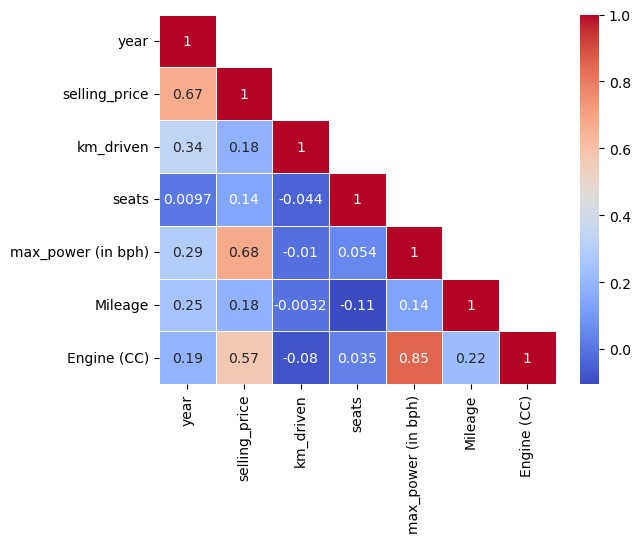

In [109]:
# Calculate the corr between numerical cols
numerical_cols = df1.select_dtypes(include=['int', 'float']).columns
corr = df1[numerical_cols].corr()
mask = ~np.tri(corr.shape[0], k=0, dtype=bool)

sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, linewidths=0.5);

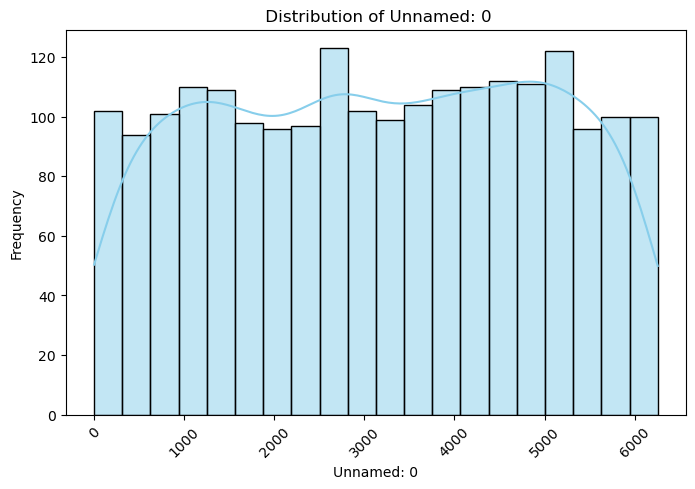

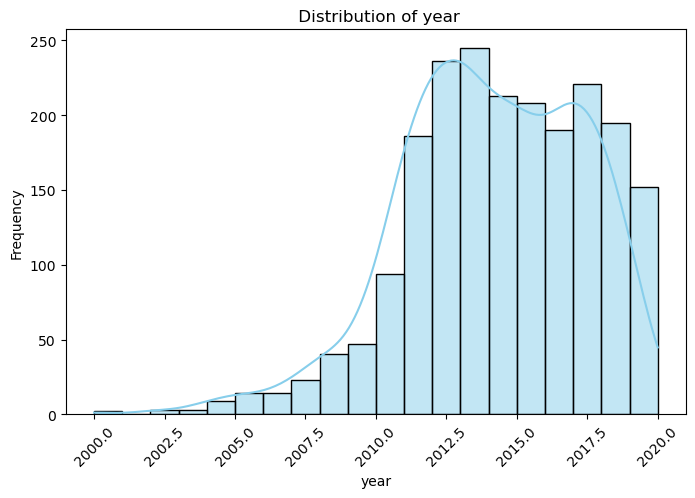

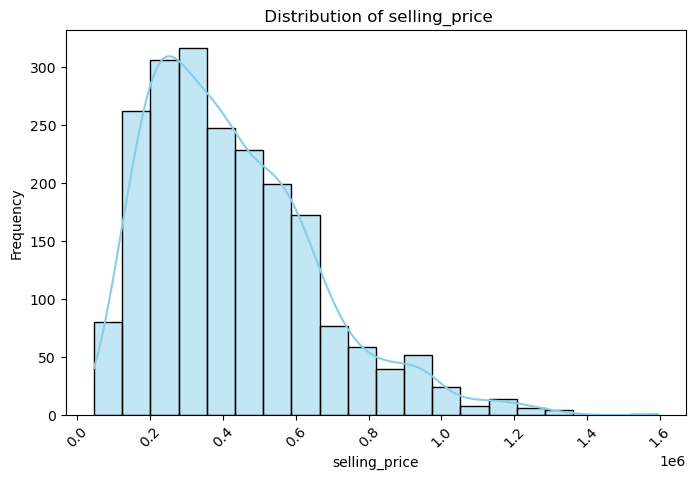

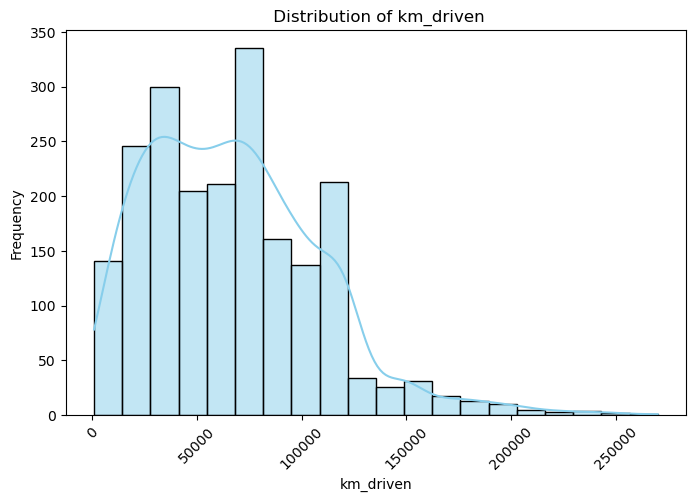

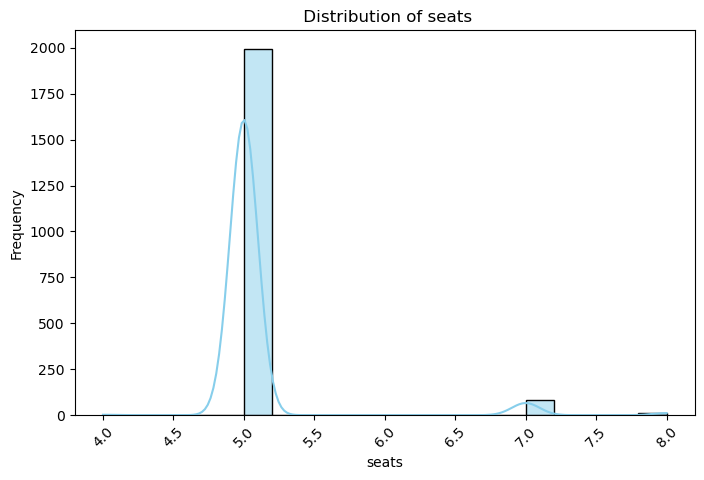

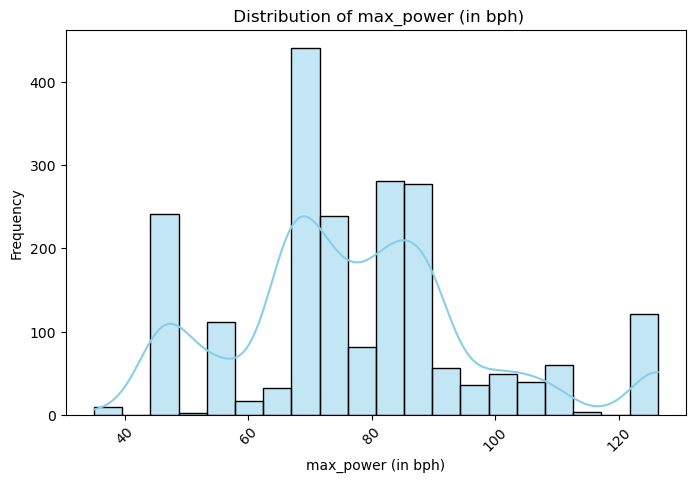

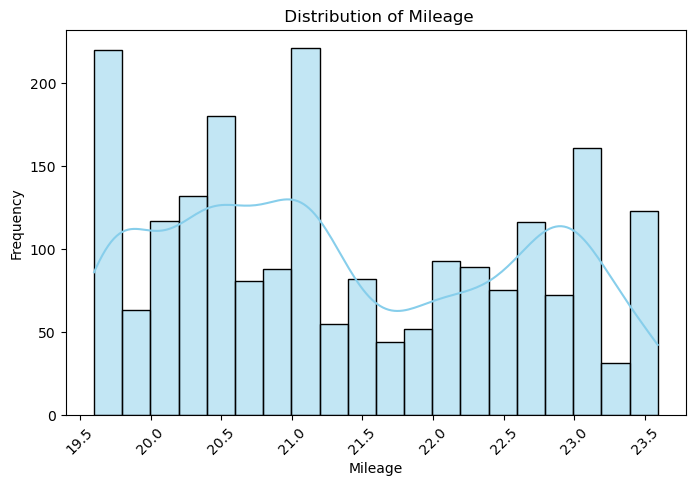

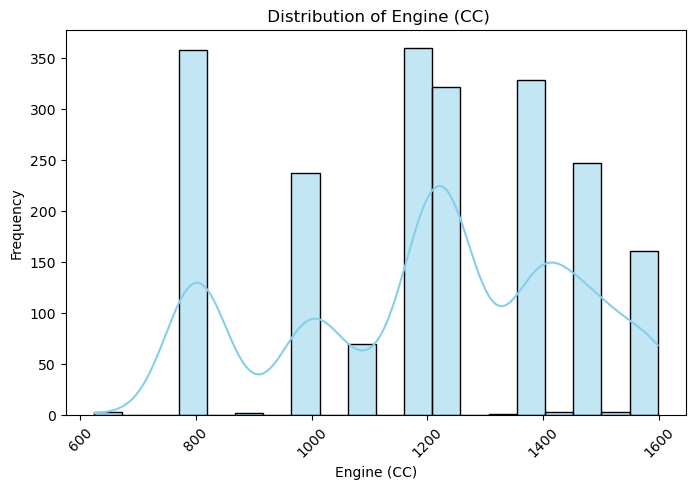

In [111]:
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=20, color='skyblue', kde=True)
    plt.title(f' Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

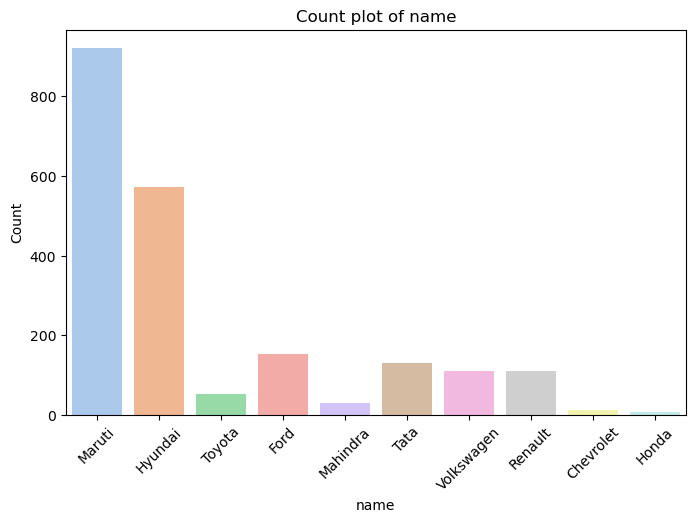

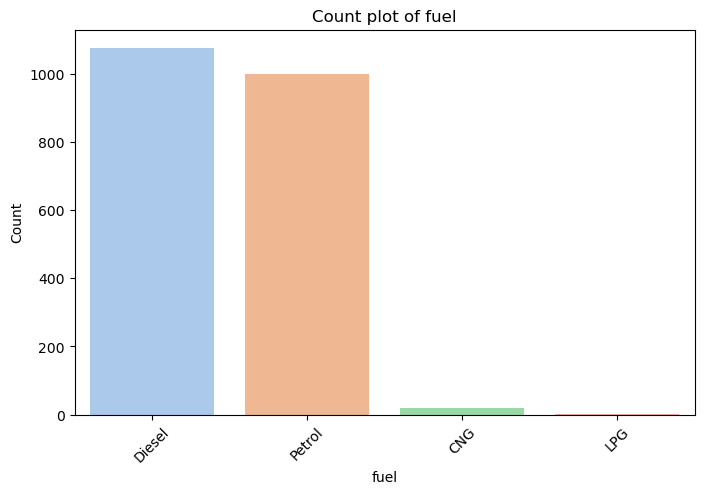

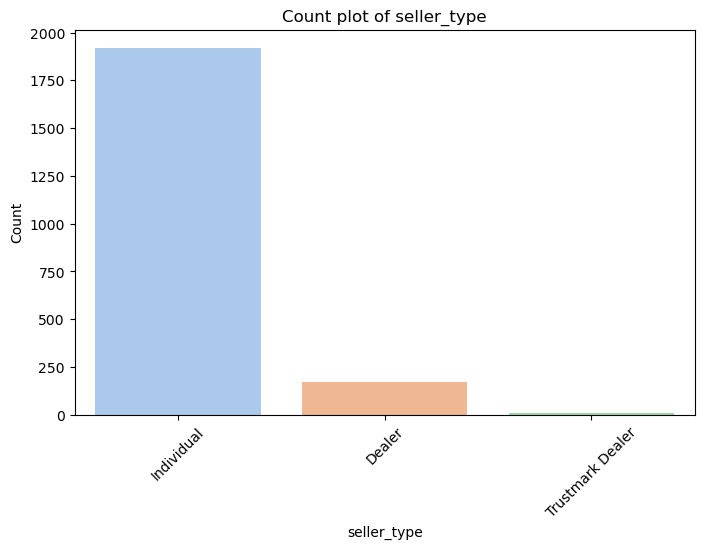

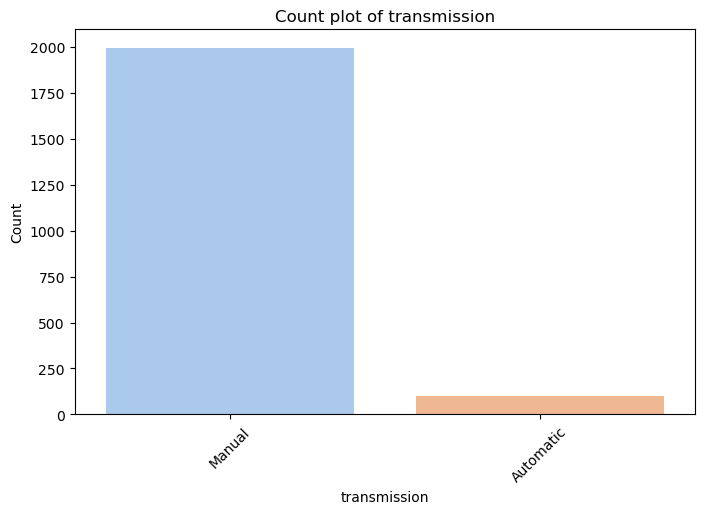

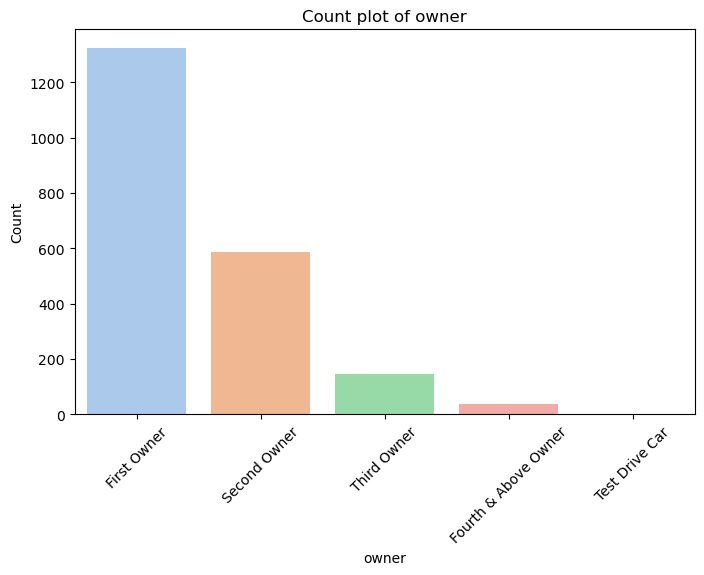

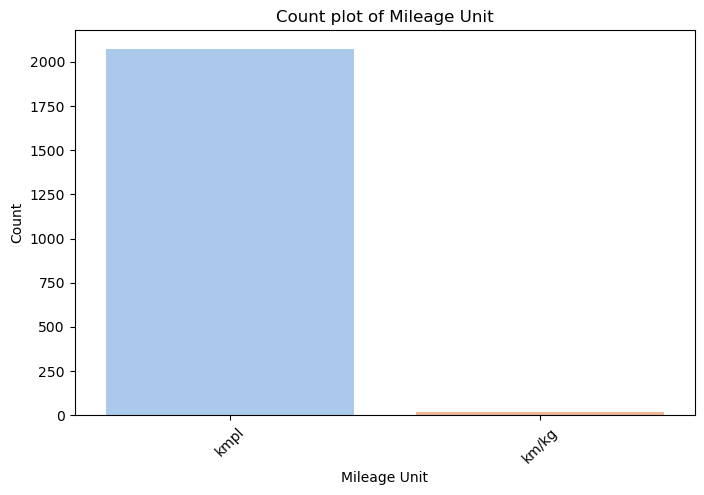

In [112]:
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue=col, palette='pastel')
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

<AxesSubplot: xlabel='name'>

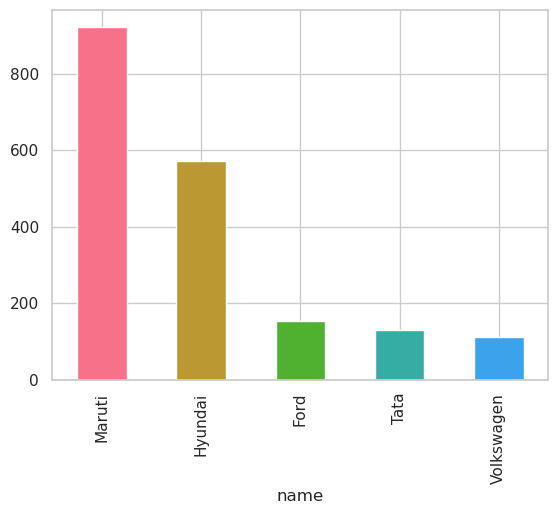

In [117]:
# Top 5 car brands
sns.set_theme(style="whitegrid", palette="husl")

names_count = df1.name.value_counts().sort_values(ascending=False).head()
names_count.plot(kind='bar', color=sns.color_palette());

In [119]:
# year with the number of car sold
pivot_table = pd.pivot_table(df, values='name', index='year', aggfunc='count')
pivot_table.sort_values(by='name', ascending=False).head()

,name
year,
2013,245
2012,236
2017,221
2014,213
2015,208
